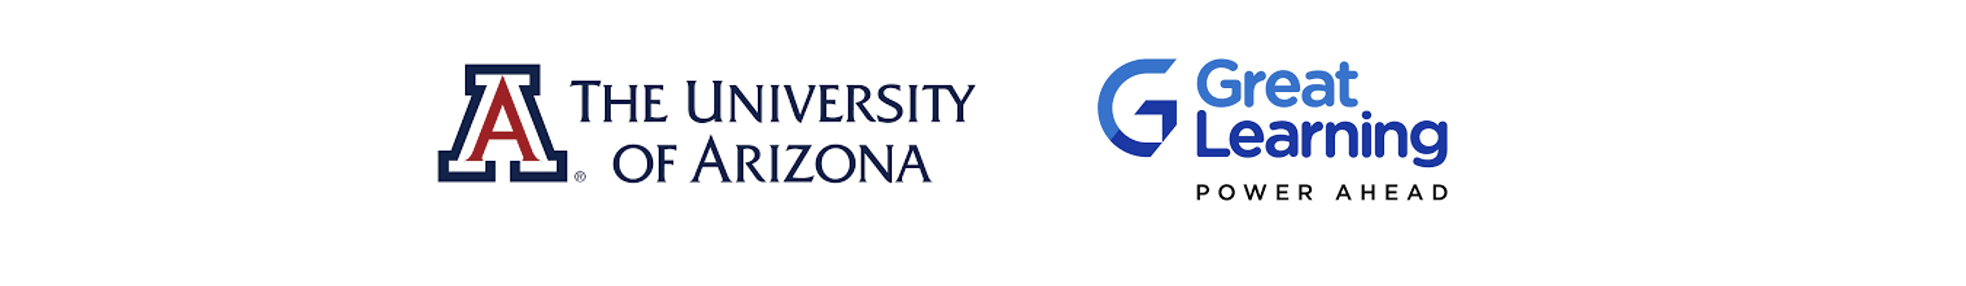

# **<font color='darkblue'> Re-Sampling Methods**

## **<font color='blue'>Agenda**


- Bias-Variance Error
- Cross Validation
- Implementing K-fold Cross Validation
- Bootstrap Sampling
- Case Study

## **<font color='blue'>Bias-Variance Error**

We can decompose the error of the learned model into two parts:

**Bias Error :** It is the difference between predicted values and actual values of the model
- This class of models can’t fit the training data.
- Accuracy is low in both training and testing data
- Fix: a more complex model class.

**Variance Error :** It is the variation in the prediction when a data from different distribution is used
- This class of models could fit the training data well but fail to fit in test because of different distribution of data
- Accuracy in test is relatively much lower than in training
- Fix: a less complex model class.

**Bias and variance using bulls-eye diagram**

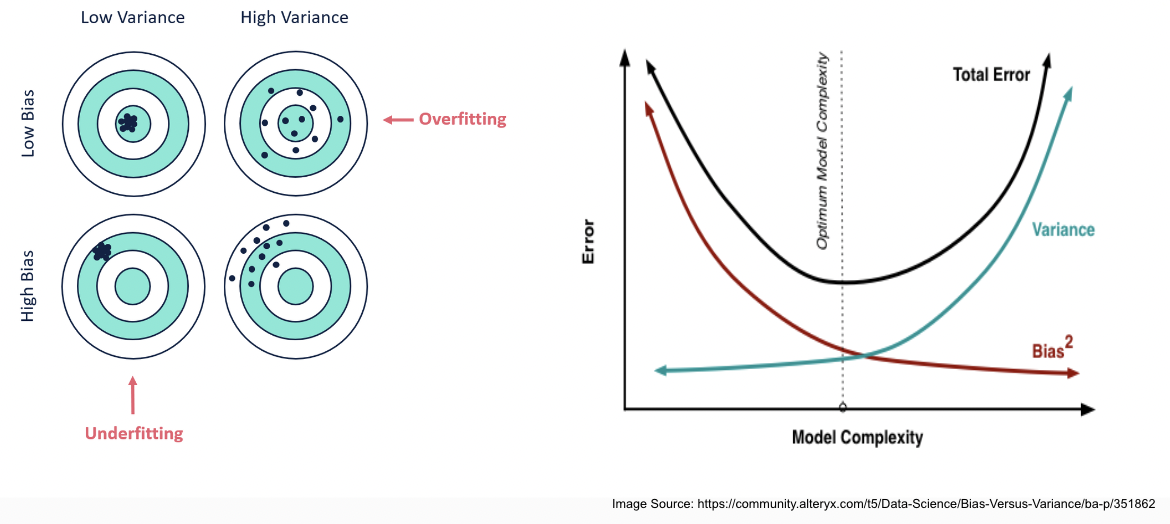

**Highly Accurate & Generalizable Model**

1. Models generalize well when they are neither overfit nor underfit

2. Right fit models are the ones which have minimal bias and variance errors

3. All models are impacted by three types of errors which reduce their predicting power.
  - Bias error
  - Variance errors
  - Random errors


**Modelling Errors:**

- **Bias errors :**
  - Caused by the decisions taken at the various stages of modelling starting from data collection / sampling stage
  - Choice of attributes based on the analysis of the data available
  - Choice of the complexity of the model based on observations in the data
  - Splitting the data into training validation and testing
  - Class size. Algorithms have a bias towards higher represented class for overall accuracy

- **Variance errors:** (Known variance)
  - Variance in the behaviour of the model
  - The model based on a sample will perform differently on different samples
  - Variance errors increase with increase in number of attributes in the model due to increase in degrees of freedom for the data points to wriggle in

- **Random errors :** (unknown variance)
  - Caused by unknown factors. They cannot be modelled


## **<font color='blue'>Cross Validation**

### Need for Cross Validation

We wish to know how well a ML model is likely to perform in production. Model’s performance in training is not guaranteed in production performance.

To estimate the model production score, hold a part of the sample data out of training phase. We call it test data which represents the universe.

Usually the available data is not sufficient to split into training and test set and expect the two to represent the universeHence the model error on test data may not be good estimate of the model error in the universe

In the absence of large data sets, a number of techniques can be employed to estimate the model error in production. One of the techniques is cross validation


### What is Cross Validation?

- Cross-validation is a technique to evaluate / validate a machine learning model and estimate its performance on unseen data

- The techniques creates and validates given model multiple times

- The number of times it does so, is dependent on the value selected by the user of the technique. Usually expressed as “K” which is always an integer

- The sequence of steps used is iterated through as many times as K

- The process begins by dividing the original data into K parts / folds using random function


### Cross Validation Procedure

1. Shuffle the dataset randomly

2. Split the dataset into k folds

3. For each distinct fold:
  1. Keep the fold data separate / hold out data set
  2. Use the remaining folds as a single training data set
  3. Fit the model on the training set and evaluate it on the test set
  4. Retain the evaluation score and discard the model
  5. Loop back

4. The steps 3.1 to 3.5 will be executed K times

5. Summarize the scores and average it by dividing the sum by K.

6. Analyze the average score, the dispersion to assess the likely performance of the model in the unseen data (production data / universe)


## **<font color='blue'>Implementing K-fold Cross Validation**

Visual understanding (example based on scikit learn guide)

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
data = array([10,20,30,40,50,60,70,80,90,100])
kfold = KFold(5)
for train, test in kfold.split(data):
  print('train: %s, test: %s' % (data[train], data[test]))


train: [ 30  40  50  60  70  80  90 100], test: [10 20]
train: [ 10  20  50  60  70  80  90 100], test: [30 40]
train: [ 10  20  30  40  70  80  90 100], test: [50 60]
train: [ 10  20  30  40  50  60  90 100], test: [70 80]
train: [10 20 30 40 50 60 70 80], test: [ 90 100]


### Configuring the K


1. K is an integral number. Minimum value of K has to be 2. There will be two iterations in this case

2. Max value of K can be the number of data points. This is also known as Leave One Out Cross Validation or LOOCV

3. Whatever the value of K chosen, the resulting training and test data should be  representative of the unseen data as much as possible

4. There is no formula to decide the K but K = 10 is usually considered good

5. Too large a K, means less variance across the training sets thus limit the model differences across iterations

6. For a sample size (N) of n, and K = k,  number of records (r) per fold = n/k.


### Evaluating The Model In An Iteration

1. In each iteration, the model is trained on K -1 number of folds  and evaluated on the left out fold.

2. The MSE or Mean Squared Error is thus calculated on the left out fold

3. Since the procedure is repeated K times, we will have K MSEs. Total up all the MSE and divide by K to get the overall expected MSE


        CVk  = (sum(MSEi)*1/K for i = 1 to K

### Some Salient Features Of K-fold

- Each record / data point in the sample data  before creating the Kfolds, is assigned to a single fold and stays in that fold for the duration of the procedure.

- This means that each data point is used once in hold-out set and K-1 times in training

- Very important point to keep in mind is, any transformation to data such as standardizing or any other data preparation that is required before building the model, must be done in the iteration on the training folds rather than on the entire  data set.

- When hyper parameters are to be tweaked, split the original data into two. Keep one part aside. Use the other to do the Kfold validation. Once the optimal hyperparameters are found, assess the model on the test data

- Any data transformation done on the whole set outside the loop, may lead to data leakage and overfitting


## **<font color='blue'>Bootstrap Sampling**

- Also known as sampling with replacement, is a sampling technique used when the amount of data is limited

- A random function is used to create the sample from the original dataset. That a record has already been picked earlier for the sample is immaterial.

- Within a sample, there may be repeating records. Could be duplicates or more but two sample sets are unlikely to be 100% same.

- The records not picked up in an iteration will serve the purpose of test data and test data will always have unique records

- Suppose we have 10 data points in the  dataset. We can create multiple sample sets each with 10 data points  or less and corresponding test data.

- The number of samples created maybe 10, more than 10 or less than 10

- The more the samples we create from a small size data, more likely we will have samples that are very similar in terms of the data points



In [ ]:
from sklearn.utils import resample
import numpy as np

# load dataset
data = [10,20,30,40,50,60,70,80,90,100]   # original data with 10 data points

# configure bootstrap
n_iterations = 50              # Number of bootstrap samples to create = 50
n_size = int(len(data) * 1)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(data, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in data if x not in train])  # picking rest of the data not considered in sample
	print("Train_data ->", train, " " , "Test_data ->", test)


Train_data -> [60, 70, 20, 20, 60, 50, 70, 70, 30, 50]   Test_data -> [ 10  40  80  90 100]
Train_data -> [40, 90, 10, 10, 100, 100, 60, 50, 90, 50]   Test_data -> [20 30 70 80]
Train_data -> [90, 80, 40, 80, 70, 70, 50, 70, 50, 40]   Test_data -> [ 10  20  30  60 100]
Train_data -> [10, 40, 80, 70, 30, 90, 60, 90, 10, 80]   Test_data -> [ 20  50 100]
Train_data -> [60, 10, 10, 10, 30, 50, 90, 20, 70, 80]   Test_data -> [ 40 100]
Train_data -> [70, 80, 90, 10, 50, 10, 100, 100, 70, 80]   Test_data -> [20 30 40 60]
Train_data -> [10, 100, 80, 80, 80, 30, 80, 20, 90, 50]   Test_data -> [40 60 70]
Train_data -> [30, 50, 30, 60, 10, 70, 60, 80, 60, 50]   Test_data -> [ 20  40  90 100]
Train_data -> [50, 60, 70, 20, 40, 40, 10, 50, 40, 30]   Test_data -> [ 80  90 100]
Train_data -> [90, 80, 10, 70, 80, 30, 50, 60, 50, 60]   Test_data -> [ 20  40 100]
Train_data -> [80, 10, 70, 80, 30, 100, 80, 10, 90, 70]   Test_data -> [20 40 50 60]
Train_data -> [80, 80, 40, 60, 70, 10, 90, 40, 90, 50]   

- With the bootstrap samples available, we can create models on the training and test and average out the scores over all the runs.

- When we create and test our model on bootstrapped data set, each iteration will give a performance score

- When we increase the number of iterations to a large number and plot the frequency curve for the performance scores, one will notice the performance scores tend to follow normal distribution.

- For very large number of iterations, the distribution becomes almost normal.


# **<font color='darkblue'> Case Study**

## **Objective**

The objective of this case study is to analyze the effectiveness of resampling methods in improving model performance and addressing data-related challenges in machine learning tasks. This will focus on Bootstrap and k-fold Cross-Validation

### **Data Description**

We will use the insurance data for this case study.

- Age : Age of the customer
- Sex : Sex of the customer
- BMI : Customer BMI
- Children: No. of children the customer has
- Smoker : Whether the customer is smoker or not
- Region : Region of the customer
- Charges : Total charges

## **Import Libraries**



**Let us start by importing necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy.stats as stats

## **Read and Overview the dataset**

In [ ]:
# Let us import the files from our system. Note that you can also load the data from the drive.
In_df = pd.read_csv("/content/drive/MyDrive/UoA Developments/Course 3 - 523/Industry Session/Week 2/insurance.csv")

In [ ]:
# we have loaded the data into the In_df data frame. Let us now have a quick look.
In_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
In_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**

- There are no missing values in the dataset
- We have 4 numeric and 3 categorical variables

In [ ]:
In_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations:**

- Age of the customers ranges from 18 to 64
- The highest charge is 63770.428

In [ ]:
In_df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
In_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
In_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
In_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
## Label Encoding of categorical data. Use it only if one hot encoding is not required
In_df['sex'] = In_df['sex'].map({'male': 1, 'female': 0})
In_df['smoker'] = In_df['smoker'].map({'yes': 1, 'no': 0})
In_df['region'] = In_df['region'].map({'southeast': 3, 'southwest': 2,'northwest': 1,'northeast': 0})

In [ ]:
In_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.544843,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
from sklearn import preprocessing
# Scale the data
In_df_scaled = preprocessing.scale(In_df)
In_df_scaled = pd.DataFrame(In_df_scaled, columns=In_df.columns)
In_df_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,0.402874,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,1.288007,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,1.288007,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.482258,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.482258,-0.776802


In [ ]:
# Split the data into train and test

#decide your regressor and predictor variables
In_df_x=In_df_scaled[["age","sex","bmi","children", "smoker", "region"]]
In_df_y=In_df_scaled["charges"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(In_df_x,In_df_y,test_size=0.3,random_state=1)

In [ ]:
print(In_df.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1338, 7)
(936, 6)
(936,)
(402, 6)
(402,)


## **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Test MSE: " +str(mean_squared_error(y_test, predictions)))


print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

Test MSE: 0.2509675645271127
0.754483808684739
0.7404858549911035


In [ ]:
model.coef_

array([ 0.29181067, -0.01171389,  0.16291073,  0.03401152,  0.80223898,
       -0.03155514])

## **Performance assessment, testing and validation**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(In_df_x,In_df_y,test_size=0.1,random_state=1)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(In_df_x,In_df_y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape, x_test.shape, x_val.shape

((1070, 6), (134, 6), (268, 6))

In [ ]:
model.fit(x_train, y_train)

print("*********Training set Metrics**************")
print("R-Squared:", model.score(x_train, y_train))

train_predictions = model.predict(x_train)
mse_train= (mean_squared_error(y_train, train_predictions))
print('MSE: ', mse_train)

print("\n********Validation set Metrics**************")
print("R-Squared:", model.score(x_val, y_val))

val_predictions = model.predict(x_val)
mse_val= (mean_squared_error(y_val, val_predictions))
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.7477189944705613
MSE:  0.2510865235218304

********Validation set Metrics**************
R-Squared: 0.7621302054070109
MSE:  0.24231393968081832


## **Regularization**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(x_train, y_train)

print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(x_train, y_train))

train_predictions = ridge.predict(x_train)
mse_train= (mean_squared_error(y_train, train_predictions))
print('MSE: ', mse_train)

print("\n********Validation set Metrics**************")
print("R-Squared:", ridge.score(x_val, y_val))

val_predictions = ridge.predict(x_val)
mse_val= (mean_squared_error(y_val, val_predictions))
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.7477183291779985
MSE:  0.25108718566441385

********Validation set Metrics**************
R-Squared: 0.7620974363133133
MSE:  0.24234732100276069


## **K-Fold and LooCV**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, In_df_x, In_df_y, cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std()

# note that the same can be set as LooCV if cv parameter above is set to n, ie. 1338.

Mean Score:
0.7450117286752389 

Confidence Interval:


(0.7018760700872468, 0.788147387263231)

## **Bootstrap**

In [ ]:
# let us get a more detailed model through statsmodel.
import statsmodels.api as sm
x_ct=sm.add_constant(In_df_x)
lm2 = sm.OLS(In_df_y, x_ct).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:29:49   Log-Likelihood:                -968.89
No. Observations:                1338   AIC:                             1952.
Df Residuals:                    1331   BIC:                             1988.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.058e-17      0.014   -3.7e-15      1.0

In [ ]:
#Now, let us calculate the Intercept and slope coefficients a 1000 times using bootstrapping

import statsmodels.formula.api as smf

Intercept = []
Age = []
Sex = []
Bmi = []
Children =[]
Smoker = []
Region = []
RSquare= []
for i in range(1000):
  bootstrap_df = In_df_scaled.sample(n = 1338, replace = True )
  lm3 = smf.ols(formula= 'charges ~ age+sex+bmi+children+smoker+region', data = bootstrap_df).fit()
  Intercept.append(lm3.params.Intercept)
  Age.append(lm3.params.age)
  Sex.append(lm3.params.sex)
  Bmi.append(lm3.params.bmi)
  Children.append(lm3.params.children)
  Smoker.append(lm3.params.smoker)
  Region.append(lm3.params.region)
  RSquare.append(lm3.rsquared)

In [ ]:
med_CI = {
    'Intercept': {'Median': np.median(Intercept), '95% C.I': stats.mstats.mquantiles(Intercept, [0.025, 0.975])},
    'Age': {'Median': np.median(Age), '95% C.I': stats.mstats.mquantiles(Age, [0.025, 0.975])},
    'Sex': {'Median': np.median(Sex), '95% C.I': stats.mstats.mquantiles(Sex, [0.025, 0.975])},
    'Bmi': {'Median': np.median(Bmi), '95% C.I': stats.mstats.mquantiles(Bmi, [0.025, 0.975])},
    'Children': {'Median': np.median(Children), '95% C.I': stats.mstats.mquantiles(Children, [0.025, 0.975])},
    'Smoker': {'Median': np.median(Smoker), '95% C.I': stats.mstats.mquantiles(Smoker, [0.025, 0.975])},
    'Region': {'Median': np.median(Region), '95% C.I': stats.mstats.mquantiles(Region, [0.025, 0.975])}
}

In [ ]:
from IPython.display import display, HTML
B_med_CI = pd.DataFrame(med_CI)
B_med_CI = B_med_CI.T
display(HTML(B_med_CI.to_html()))

,Median,95% C.I
Intercept,-0.001388,"[-0.027875668028807206, 0.027169742572638662]"
Age,0.297493,"[0.2714348872264362, 0.3250548414856309]"
Sex,-0.004959,"[-0.03004604968649079, 0.021329671769496617]"
Bmi,0.17122,"[0.14259133070085606, 0.20243907479504383]"
Children,0.0471,"[0.022226998822285814, 0.07154835688198648]"
Smoker,0.795541,"[0.7578594112419343, 0.8320738059982135]"
Region,-0.035357,"[-0.06327484009967732, -0.005571173649624599]"


The above table displays the median and 95% confidence interval of the model coefficients

In [ ]:
lm3.rsquared

0.7478988922688877

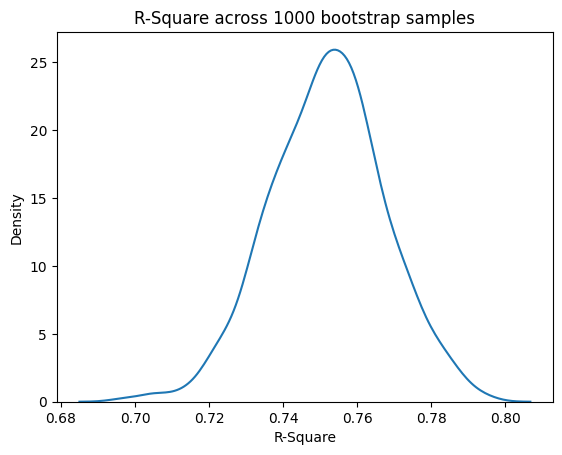

In [ ]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(RSquare)
plt.title("R-Square across 1000 bootstrap samples")
plt.xlabel("R-Square")
plt.show()

We can now take the median RSquare of the bootstrap samples, and compute confidence intervals.

In [ ]:
# get median
median = np.percentile(RSquare, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(RSquare, alpha/2)
upper_ci = np.percentile(RSquare, 100-alpha/2)

print(f"RSquare from 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Median RSquare is {median:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

RSquare from 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median RSquare is 0.7521 with a 95% a confidence interval of [0.72,0.78].


- From K-fold cross validation, we got the mean RSquared value of 0.745 with a confidence interval of [0.70, 0.78]

- From bootstrap cross validation approach (from 1000 bootstrap samples) we got the median RSquared value of 0.7519 with a 95% confidence interval of [0.72, 0.78]

Therefore, the model is expected to provide similar results for the unseen data